# HOG+SVM
In this part, we use HOG(histogram of oriented gradient) to extract features and use SVM to train the model.
Because the performance of traditional method is not always related to the size of data set, we choose part of train set to train the model.


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import pickle
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import *
from skimage.feature import hog
import pandas as pd
import seaborn as sns
from thundersvm import SVC

In [2]:
X_train= pickle.load(open("X_train","rb"))
y_train= pickle.load(open("y_train","rb"))
X_test= pickle.load(open("X_test","rb"))
y_test= pickle.load(open("y_test","rb"))

In [3]:
X_train.shape

(36228, 128, 128, 1)

In [4]:
X_train=np.reshape(X_train,(X_train.shape[0],-1))
X_test=np.reshape(X_test,(X_test.shape[0],-1))

In [5]:
#choose part of train set to train
X_train=X_train[:2000]
y_train=y_train[:2000]
X_test=X_test[:400]
y_test=y_test[:400]

In [6]:
X_train.shape

(2000, 16384)

In [7]:
winSize = (64,64)
blockSize = (32,32)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9

In [8]:
hog = cv.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
hog_features_train = []
hog_features_test = []
for i in range(X_train.shape[0]):
    hog_feature_train = hog.compute(X_train[i].reshape(128, 128))
    hog_feature_train = np.squeeze(hog_feature_train)
    hog_features_train.append(hog_feature_train)
hog_features_train = np.array(hog_features_train)

In [9]:
np.save("hog_features_train",hog_features_train)

In [10]:
for i in range(X_test.shape[0]):
    hog_feature_test = hog.compute(X_test[i].reshape(128, 128))
    hog_feature_test = np.squeeze(hog_feature_test)
    hog_features_test.append(hog_feature_test)
hog_features_test = np.array(hog_features_test)

In [11]:
np.save("hog_features_test",hog_features_test)

In [12]:
hog_features_train.shape

(2000, 291600)

In [27]:
sv=svm.SVC(kernel='rbf',C=10)

In [28]:
sv.fit(hog_features_train,y_train)

SVC(C=10)

In [29]:
sv.predict(hog_features_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [30]:
y_pred=sv.predict(hog_features_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       195
           1       0.71      0.72      0.72       205

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



In [32]:
print(confusion_matrix(y_test,y_pred))

[[135  60]
 [ 57 148]]


In [33]:
print(accuracy_score(y_test,y_pred))

0.7075


In [2]:
y_train= pickle.load(open("y_train","rb"))[:2000]
y_test=pickle.load(open("y_test","rb"))[:400]
hog_features_train=np.load("hog_features_train.npy")
hog_features_test=np.load("hog_features_test.npy")

In [3]:
def hog_svm(ker,C):
    params = {}
    sv=SVC(kernel=ker,C=C)
    sv.fit(hog_features_train,y_train)
    y_pred=sv.predict(hog_features_test)
    params['cm']=confusion_matrix(y_test,y_pred)
    params['cr']=classification_report(y_test,y_pred)
    params['acc']=accuracy_score(y_test,y_pred)
    params['prec']=precision_score(y_test,y_pred,average='weighted')
    params['rec']=recall_score(y_test,y_pred,average='weighted')
    params['f1']=f1_score(y_test,y_pred,average='weighted')
    params['auc']=roc_auc_score(y_test,y_pred)
    params['roc']=roc_curve(y_test,y_pred)
    params['tpr']=params['roc'][0]
    params['fpr']=params['roc'][1]

    print(classification_report(y_test,y_pred))
    print('confusion matrix:',confusion_matrix(y_test,y_pred))
    print('accuracy:',accuracy_score(y_test,y_pred))
    print('precision:',precision_score(y_test,y_pred,average='weighted'))
    print('recall:',recall_score(y_test,y_pred,average='weighted'))
    print('f1 score:',f1_score(y_test,y_pred,average='weighted'))
    print('auc:',roc_auc_score(y_test,y_pred))
    return params

In [4]:
#use different kernel and C to train the model
sl001=hog_svm('linear',0.01)

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       195
           1       0.68      0.65      0.66       205

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400

confusion matrix: [[131  64]
 [ 72 133]]
accuracy: 0.66
precision: 0.6605961341301793
recall: 0.66
f1 score: 0.6600340008500214
auc: 0.660287679799875


In [5]:
sl01=hog_svm('linear',0.1)

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       195
           1       0.64      0.61      0.63       205

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400

confusion matrix: [[123  72]
 [ 79 126]]
accuracy: 0.6225
precision: 0.6229804230423042
recall: 0.6225
f1 score: 0.6225495496621685
auc: 0.6227016885553471


In [6]:
sl1=hog_svm('linear',1)

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       195
           1       0.64      0.61      0.63       205

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400

confusion matrix: [[123  72]
 [ 79 126]]
accuracy: 0.6225
precision: 0.6229804230423042
recall: 0.6225
f1 score: 0.6225495496621685
auc: 0.6227016885553471


In [7]:
sl10=hog_svm('linear',10)

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       195
           1       0.64      0.61      0.63       205

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400

confusion matrix: [[123  72]
 [ 79 126]]
accuracy: 0.6225
precision: 0.6229804230423042
recall: 0.6225
f1 score: 0.6225495496621685
auc: 0.6227016885553471


In [8]:
sl100=hog_svm('linear',100)

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       195
           1       0.64      0.61      0.63       205

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400

confusion matrix: [[123  72]
 [ 79 126]]
accuracy: 0.6225
precision: 0.6229804230423042
recall: 0.6225
f1 score: 0.6225495496621685
auc: 0.6227016885553471


In [9]:
sr001=hog_svm('rbf',0.01)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       0.51      1.00      0.68       205

    accuracy                           0.51       400
   macro avg       0.26      0.50      0.34       400
weighted avg       0.26      0.51      0.35       400

confusion matrix: [[  0 195]
 [  0 205]]
accuracy: 0.5125
precision: 0.26265625
recall: 0.5125
f1 score: 0.34731404958677686
auc: 0.5


D:\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classificat

In [10]:
sr01=hog_svm('rbf',0.1)

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       195
           1       0.66      0.76      0.71       205

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.67       400
weighted avg       0.68      0.68      0.68       400

confusion matrix: [[116  79]
 [ 50 155]]
accuracy: 0.6775
precision: 0.6801391463289054
recall: 0.6775
f1 score: 0.6751984490058619
auc: 0.6754846779237023


In [11]:
sr1=hog_svm('rbf',1)

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       195
           1       0.72      0.72      0.72       205

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

confusion matrix: [[137  58]
 [ 57 148]]
accuracy: 0.7125
precision: 0.7124693474126715
recall: 0.7125
f1 score: 0.7124802194159335
auc: 0.7122576610381488


In [12]:
sr10=hog_svm('rbf',10)

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       195
           1       0.71      0.72      0.72       205

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

confusion matrix: [[135  60]
 [ 57 148]]
accuracy: 0.7075
precision: 0.7074368990384616
recall: 0.7075
f1 score: 0.7074286277380483
auc: 0.7071294559099437


In [13]:
sr100=hog_svm('rbf',100)

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       195
           1       0.71      0.72      0.72       205

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

confusion matrix: [[135  60]
 [ 57 148]]
accuracy: 0.7075
precision: 0.7074368990384616
recall: 0.7075
f1 score: 0.7074286277380483
auc: 0.7071294559099437


In [14]:
sp001=hog_svm('poly',0.01)

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       195
           1       0.68      0.70      0.69       205

    accuracy                           0.68       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.68      0.67       400

confusion matrix: [[127  68]
 [ 62 143]]
accuracy: 0.675
precision: 0.674913488302114
recall: 0.675
f1 score: 0.6748046875
auc: 0.6744215134459036


In [15]:
sp01=hog_svm('poly',0.1)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       195
           1       0.72      0.72      0.72       205

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

confusion matrix: [[138  57]
 [ 57 148]]
accuracy: 0.715
precision: 0.715
recall: 0.715
f1 score: 0.715
auc: 0.7148217636022514


In [16]:
sp1=hog_svm('poly',1)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       195
           1       0.71      0.71      0.71       205

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.71      0.70      0.71       400

confusion matrix: [[137  58]
 [ 60 145]]
accuracy: 0.705
precision: 0.7050942712110225
recall: 0.705
f1 score: 0.705029511804722
auc: 0.704940587867417


In [17]:
sp10=hog_svm('poly',10)

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       195
           1       0.71      0.70      0.71       205

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400

confusion matrix: [[138  57]
 [ 62 143]]
accuracy: 0.7025
precision: 0.7028125
recall: 0.7025
f1 score: 0.7025464916393186
auc: 0.7026266416510318


In [18]:
sp100=hog_svm('poly',100)

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       195
           1       0.71      0.70      0.71       205

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400

confusion matrix: [[138  57]
 [ 62 143]]
accuracy: 0.7025
precision: 0.7028125
recall: 0.7025
f1 score: 0.7025464916393186
auc: 0.7026266416510318


In [19]:
ss001=hog_svm('sigmoid',0.01)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       0.51      1.00      0.68       205

    accuracy                           0.51       400
   macro avg       0.26      0.50      0.34       400
weighted avg       0.26      0.51      0.35       400

confusion matrix: [[  0 195]
 [  0 205]]
accuracy: 0.5125
precision: 0.26265625
recall: 0.5125
f1 score: 0.34731404958677686
auc: 0.5


D:\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\gpu\lib\site-packages\sklearn\metrics\_classificat

In [20]:
ss01=hog_svm('sigmoid',0.1)

              precision    recall  f1-score   support

           0       0.76      0.15      0.25       195
           1       0.54      0.96      0.69       205

    accuracy                           0.56       400
   macro avg       0.65      0.55      0.47       400
weighted avg       0.65      0.56      0.48       400

confusion matrix: [[ 29 166]
 [  9 196]]
accuracy: 0.5625
precision: 0.6495256615295143
recall: 0.5625
f1 score: 0.475672918984793
auc: 0.5524077548467792


In [21]:
ss1=hog_svm('sigmoid',1)

              precision    recall  f1-score   support

           0       0.58      0.57      0.58       195
           1       0.60      0.61      0.60       205

    accuracy                           0.59       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.59      0.59       400

confusion matrix: [[111  84]
 [ 80 125]]
accuracy: 0.59
precision: 0.5898306570805881
recall: 0.59
f1 score: 0.5898563239968962
auc: 0.5894934333958725


In [22]:
ss10=hog_svm('sigmoid',10)

              precision    recall  f1-score   support

           0       0.58      0.57      0.58       195
           1       0.60      0.60      0.60       205

    accuracy                           0.59       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.59      0.59       400

confusion matrix: [[112  83]
 [ 82 123]]
accuracy: 0.5875
precision: 0.5874505805224701
recall: 0.5875
f1 score: 0.5874716191619912
auc: 0.5871794871794872


In [23]:
ss100=hog_svm('sigmoid',100)

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       195
           1       0.60      0.60      0.60       205

    accuracy                           0.58       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.58      0.58      0.58       400

confusion matrix: [[112  83]
 [ 83 122]]
accuracy: 0.585
precision: 0.585
recall: 0.585
f1 score: 0.585
auc: 0.5847404627892433


In [24]:
#save the result
res_list=[[sl001,sl01,sl1,sl10,sl100],
          [sr001,sr01,sr1,sr10,sr100],
          [sp001,sp01,sp1,sp10,sp100],
          [ss001,ss01,ss1,ss10,ss100]]
pickle_out=open("hog_svm_res","wb")
pickle.dump(res_list,pickle_out)
pickle_out.close()

In [25]:
#show the result,in the row of kernel, in the column of C
df_acc=pd.DataFrame([[sl001['acc'],sl01['acc'],sl1['acc'],sl10['acc'],sl100['acc']],
                     [sr001['acc'],sr01['acc'],sr1['acc'],sr10['acc'],sr100['acc']],
                     [sp001['acc'],sp01['acc'],sp1['acc'],sp10['acc'],sp100['acc']],
                     [ss001['acc'],ss01['acc'],ss1['acc'],ss10['acc'],ss100['acc']]],columns=['0.01','0.1','1','10','100'],index=['linear','rbf','poly','sigmoid'])
df_pre=pd.DataFrame([[sl001['prec'],sl01['prec'],sl1['prec'],sl10['prec'],sl100['prec']],
                     [sr001['prec'],sr01['prec'],sr1['prec'],sr10['prec'],sr100['prec']],
                     [sp001['prec'],sp01['prec'],sp1['prec'],sp10['prec'],sp100['prec']],
                     [ss001['prec'],ss01['prec'],ss1['prec'],ss10['prec'],ss100['prec']]],columns=['0.01','0.1','1','10','100'],index=['linear','rbf','poly','sigmoid'])
df_rec=pd.DataFrame([[sl001['rec'],sl01['rec'],sl1['rec'],sl10['rec'],sl100['rec']],
                        [sr001['rec'],sr01['rec'],sr1['rec'],sr10['rec'],sr100['rec']],
                        [sp001['rec'],sp01['rec'],sp1['rec'],sp10['rec'],sp100['rec']],
                        [ss001['rec'],ss01['rec'],ss1['rec'],ss10['rec'],ss100['rec']]],columns=['0.01','0.1','1','10','100'],index=['linear','rbf','poly','sigmoid'])
df_f1=pd.DataFrame([[sl001['f1'],sl01['f1'],sl1['f1'],sl10['f1'],sl100['f1']],
                        [sr001['f1'],sr01['f1'],sr1['f1'],sr10['f1'],sr100['f1']],
                        [sp001['f1'],sp01['f1'],sp1['f1'],sp10['f1'],sp100['f1']],
                        [ss001['f1'],ss01['f1'],ss1['f1'],ss10['f1'],ss100['f1']]],columns=['0.01','0.1','1','10','100'],index=['linear','rbf','poly','sigmoid'])
df_auc=pd.DataFrame([[sl001['auc'],sl01['auc'],sl1['auc'],sl10['auc'],sl100['auc']],
                        [sr001['auc'],sr01['auc'],sr1['auc'],sr10['auc'],sr100['auc']],
                        [sp001['auc'],sp01['auc'],sp1['auc'],sp10['auc'],sp100['auc']],
                        [ss001['auc'],ss01['auc'],ss1['auc'],ss10['auc'],ss100['auc']]],columns=['0.01','0.1','1','10','100'],index=['linear','rbf','poly','sigmoid'])
print("Accuracy:\n",df_acc)
print("Precision:\n",df_pre)
print("Recall:\n",df_rec)
print("F1 score:\n",df_f1)
print("AUC:\n",df_auc)

Accuracy:
            0.01     0.1       1      10     100
linear   0.6600  0.6225  0.6225  0.6225  0.6225
rbf      0.5125  0.6775  0.7125  0.7075  0.7075
poly     0.6750  0.7150  0.7050  0.7025  0.7025
sigmoid  0.5125  0.5625  0.5900  0.5875  0.5850
Precision:
              0.01       0.1         1        10       100
linear   0.660596  0.622980  0.622980  0.622980  0.622980
rbf      0.262656  0.680139  0.712469  0.707437  0.707437
poly     0.674913  0.715000  0.705094  0.702812  0.702812
sigmoid  0.262656  0.649526  0.589831  0.587451  0.585000
Recall:
            0.01     0.1       1      10     100
linear   0.6600  0.6225  0.6225  0.6225  0.6225
rbf      0.5125  0.6775  0.7125  0.7075  0.7075
poly     0.6750  0.7150  0.7050  0.7025  0.7025
sigmoid  0.5125  0.5625  0.5900  0.5875  0.5850
F1 score:
              0.01       0.1         1        10       100
linear   0.660034  0.622550  0.622550  0.622550  0.622550
rbf      0.347314  0.675198  0.712480  0.707429  0.707429
poly     0.67

Text(0.5, 1.0, 'sigmoid, C=100')

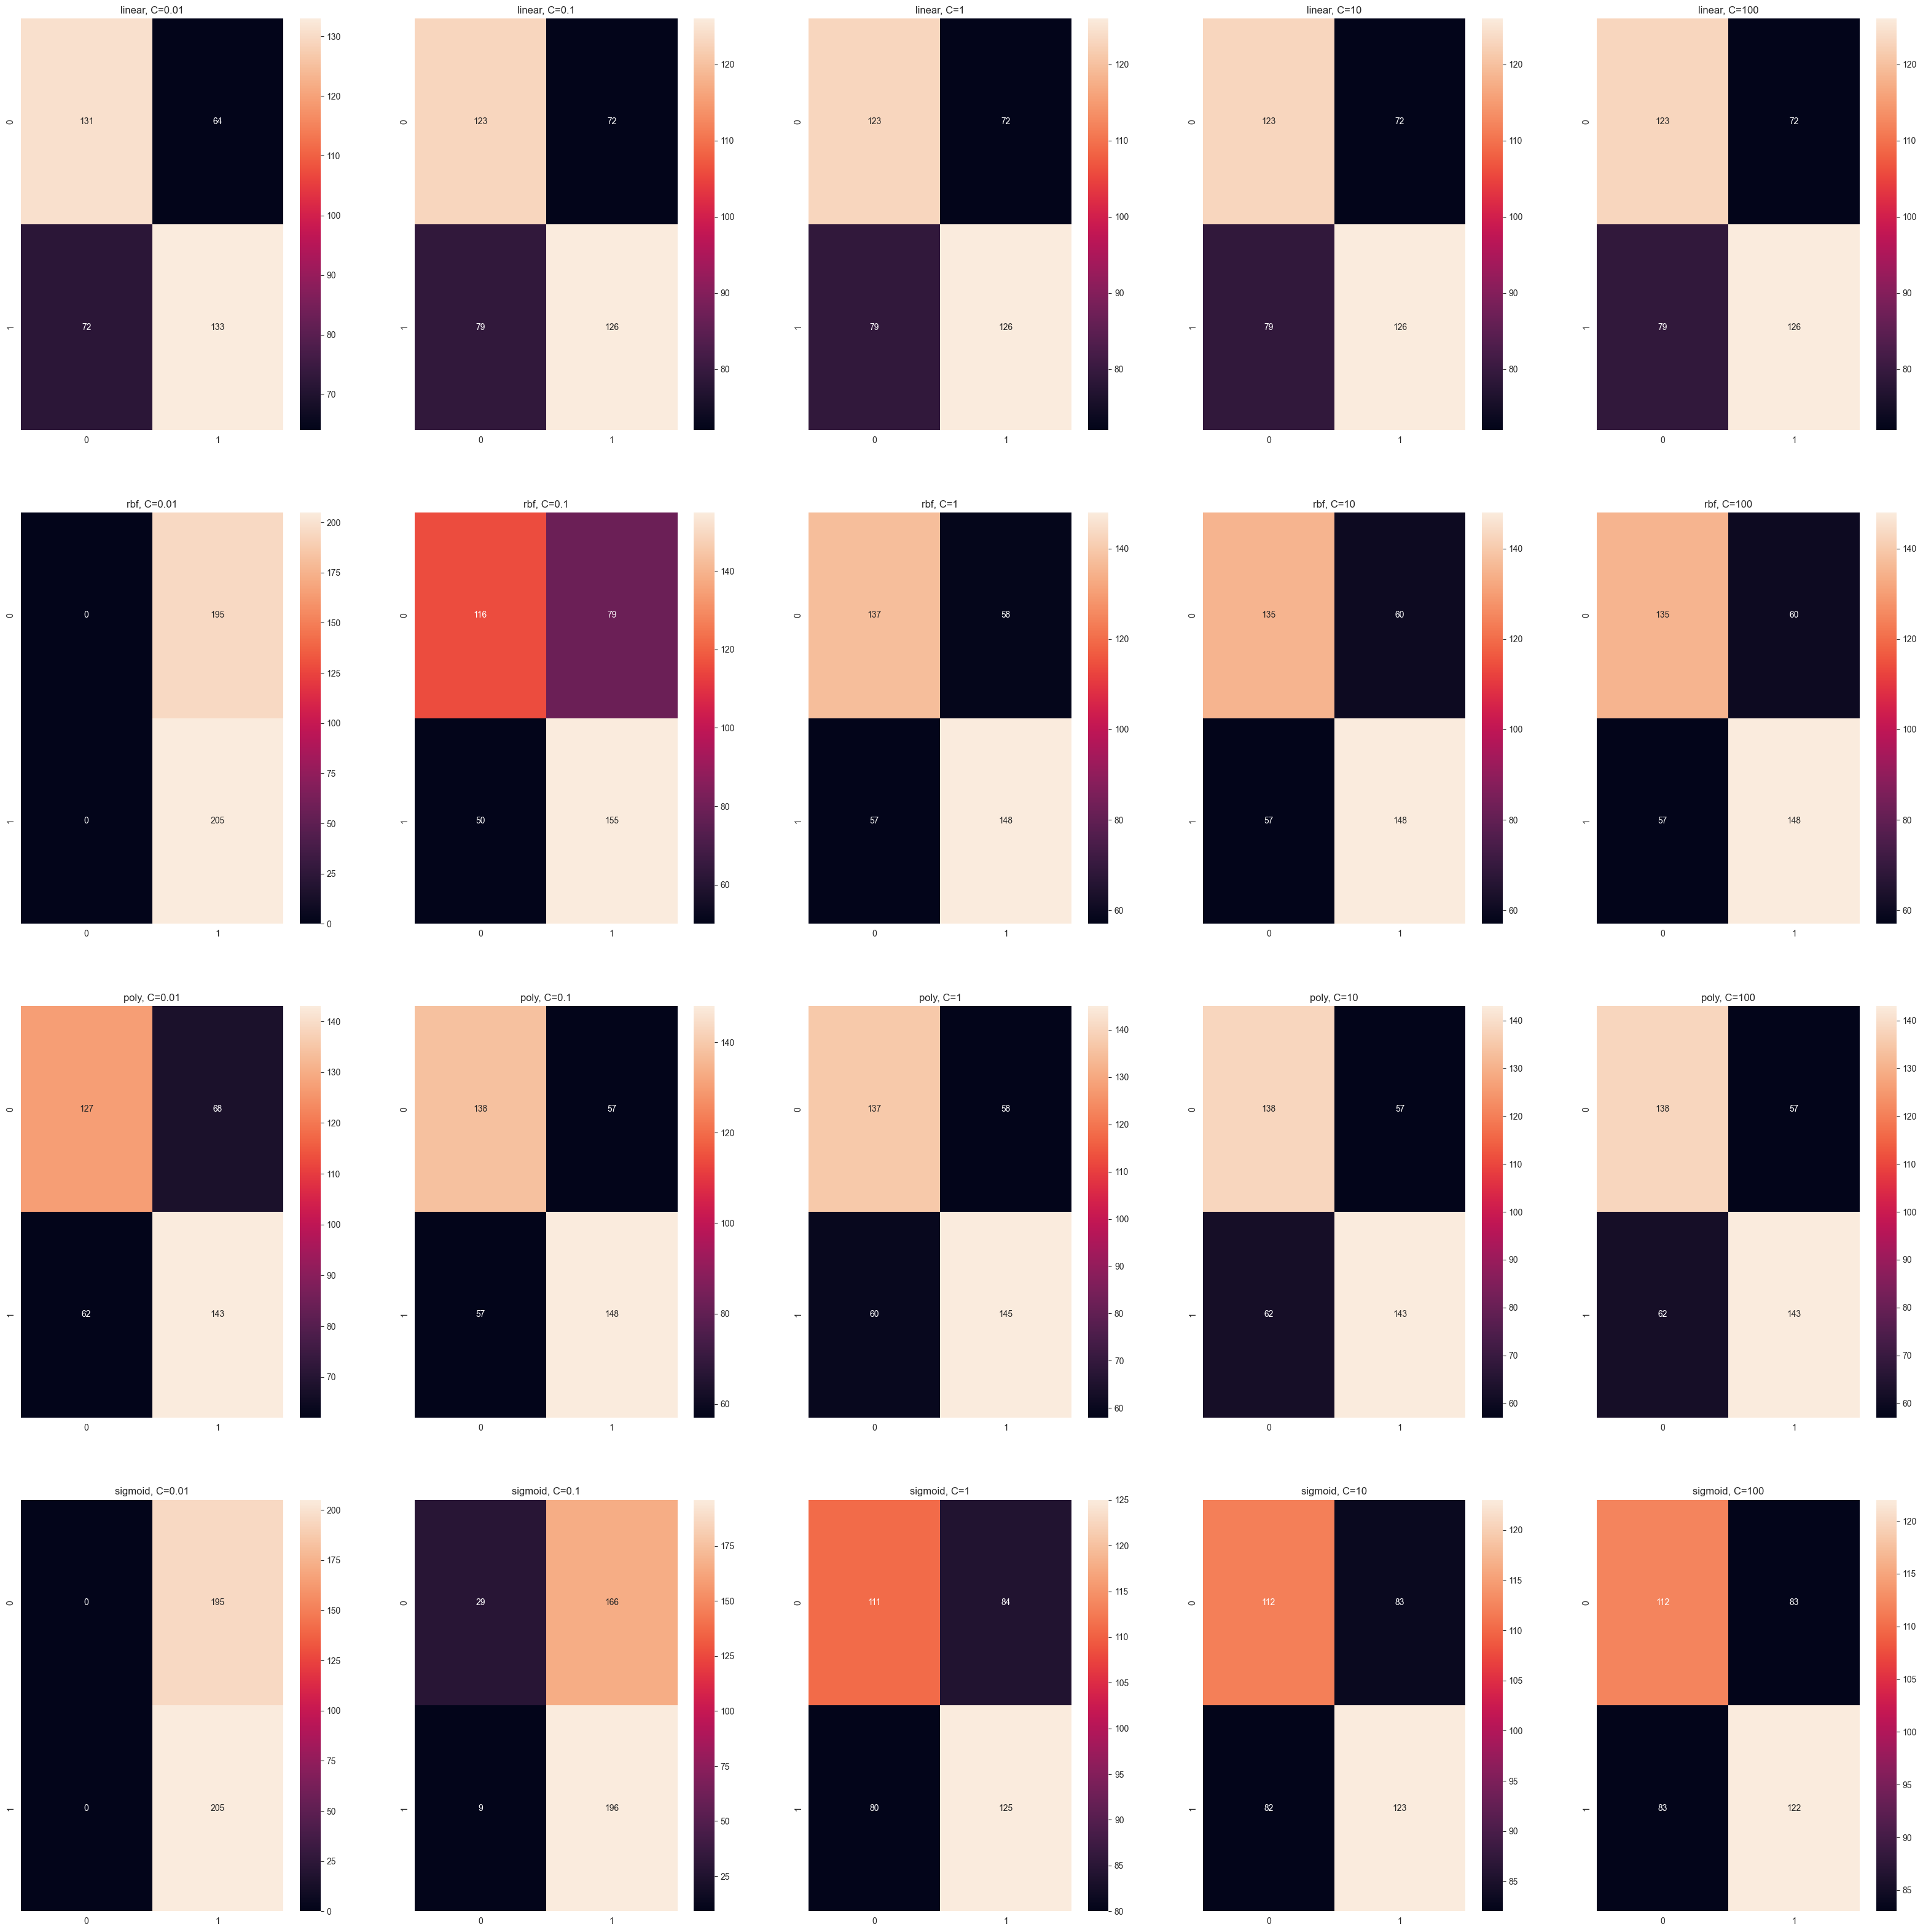

In [26]:
#show the confusion matrix(heat map) of each model in the row of kernel, in the column of C
f,axs=plt.subplots(4,5,figsize=(40,40))
sns.heatmap(sl001['cm'],annot=True,ax=axs[0,0],fmt='d')
sns.heatmap(sl01['cm'],annot=True,ax=axs[0,1],fmt='d')
sns.heatmap(sl1['cm'],annot=True,ax=axs[0,2],fmt='d')
sns.heatmap(sl10['cm'],annot=True,ax=axs[0,3],fmt='d')
sns.heatmap(sl100['cm'],annot=True,ax=axs[0,4],fmt='d')
sns.heatmap(sr001['cm'],annot=True,ax=axs[1,0],fmt='d')
sns.heatmap(sr01['cm'],annot=True,ax=axs[1,1],fmt='d')
sns.heatmap(sr1['cm'],annot=True,ax=axs[1,2],fmt='d')
sns.heatmap(sr10['cm'],annot=True,ax=axs[1,3],fmt='d')
sns.heatmap(sr100['cm'],annot=True,ax=axs[1,4],fmt='d')
sns.heatmap(sp001['cm'],annot=True,ax=axs[2,0],fmt='d')
sns.heatmap(sp01['cm'],annot=True,ax=axs[2,1],fmt='d')
sns.heatmap(sp1['cm'],annot=True,ax=axs[2,2],fmt='d')
sns.heatmap(sp10['cm'],annot=True,ax=axs[2,3],fmt='d')
sns.heatmap(sp100['cm'],annot=True,ax=axs[2,4],fmt='d')
sns.heatmap(ss001['cm'],annot=True,ax=axs[3,0],fmt='d')
sns.heatmap(ss01['cm'],annot=True,ax=axs[3,1],fmt='d')
sns.heatmap(ss1['cm'],annot=True,ax=axs[3,2],fmt='d')
sns.heatmap(ss10['cm'],annot=True,ax=axs[3,3],fmt='d')
sns.heatmap(ss100['cm'],annot=True,ax=axs[3,4],fmt='d')
axs[0,0].set_title('linear, C=0.01')
axs[0,1].set_title('linear, C=0.1')
axs[0,2].set_title('linear, C=1')
axs[0,3].set_title('linear, C=10')
axs[0,4].set_title('linear, C=100')
axs[1,0].set_title('rbf, C=0.01')
axs[1,1].set_title('rbf, C=0.1')
axs[1,2].set_title('rbf, C=1')
axs[1,3].set_title('rbf, C=10')
axs[1,4].set_title('rbf, C=100')
axs[2,0].set_title('poly, C=0.01')
axs[2,1].set_title('poly, C=0.1')
axs[2,2].set_title('poly, C=1')
axs[2,3].set_title('poly, C=10')
axs[2,4].set_title('poly, C=100')
axs[3,0].set_title('sigmoid, C=0.01')
axs[3,1].set_title('sigmoid, C=0.1')
axs[3,2].set_title('sigmoid, C=1')
axs[3,3].set_title('sigmoid, C=10')
axs[3,4].set_title('sigmoid, C=100')


Text(0.5, 1.0, 'sigmoid, C=100')

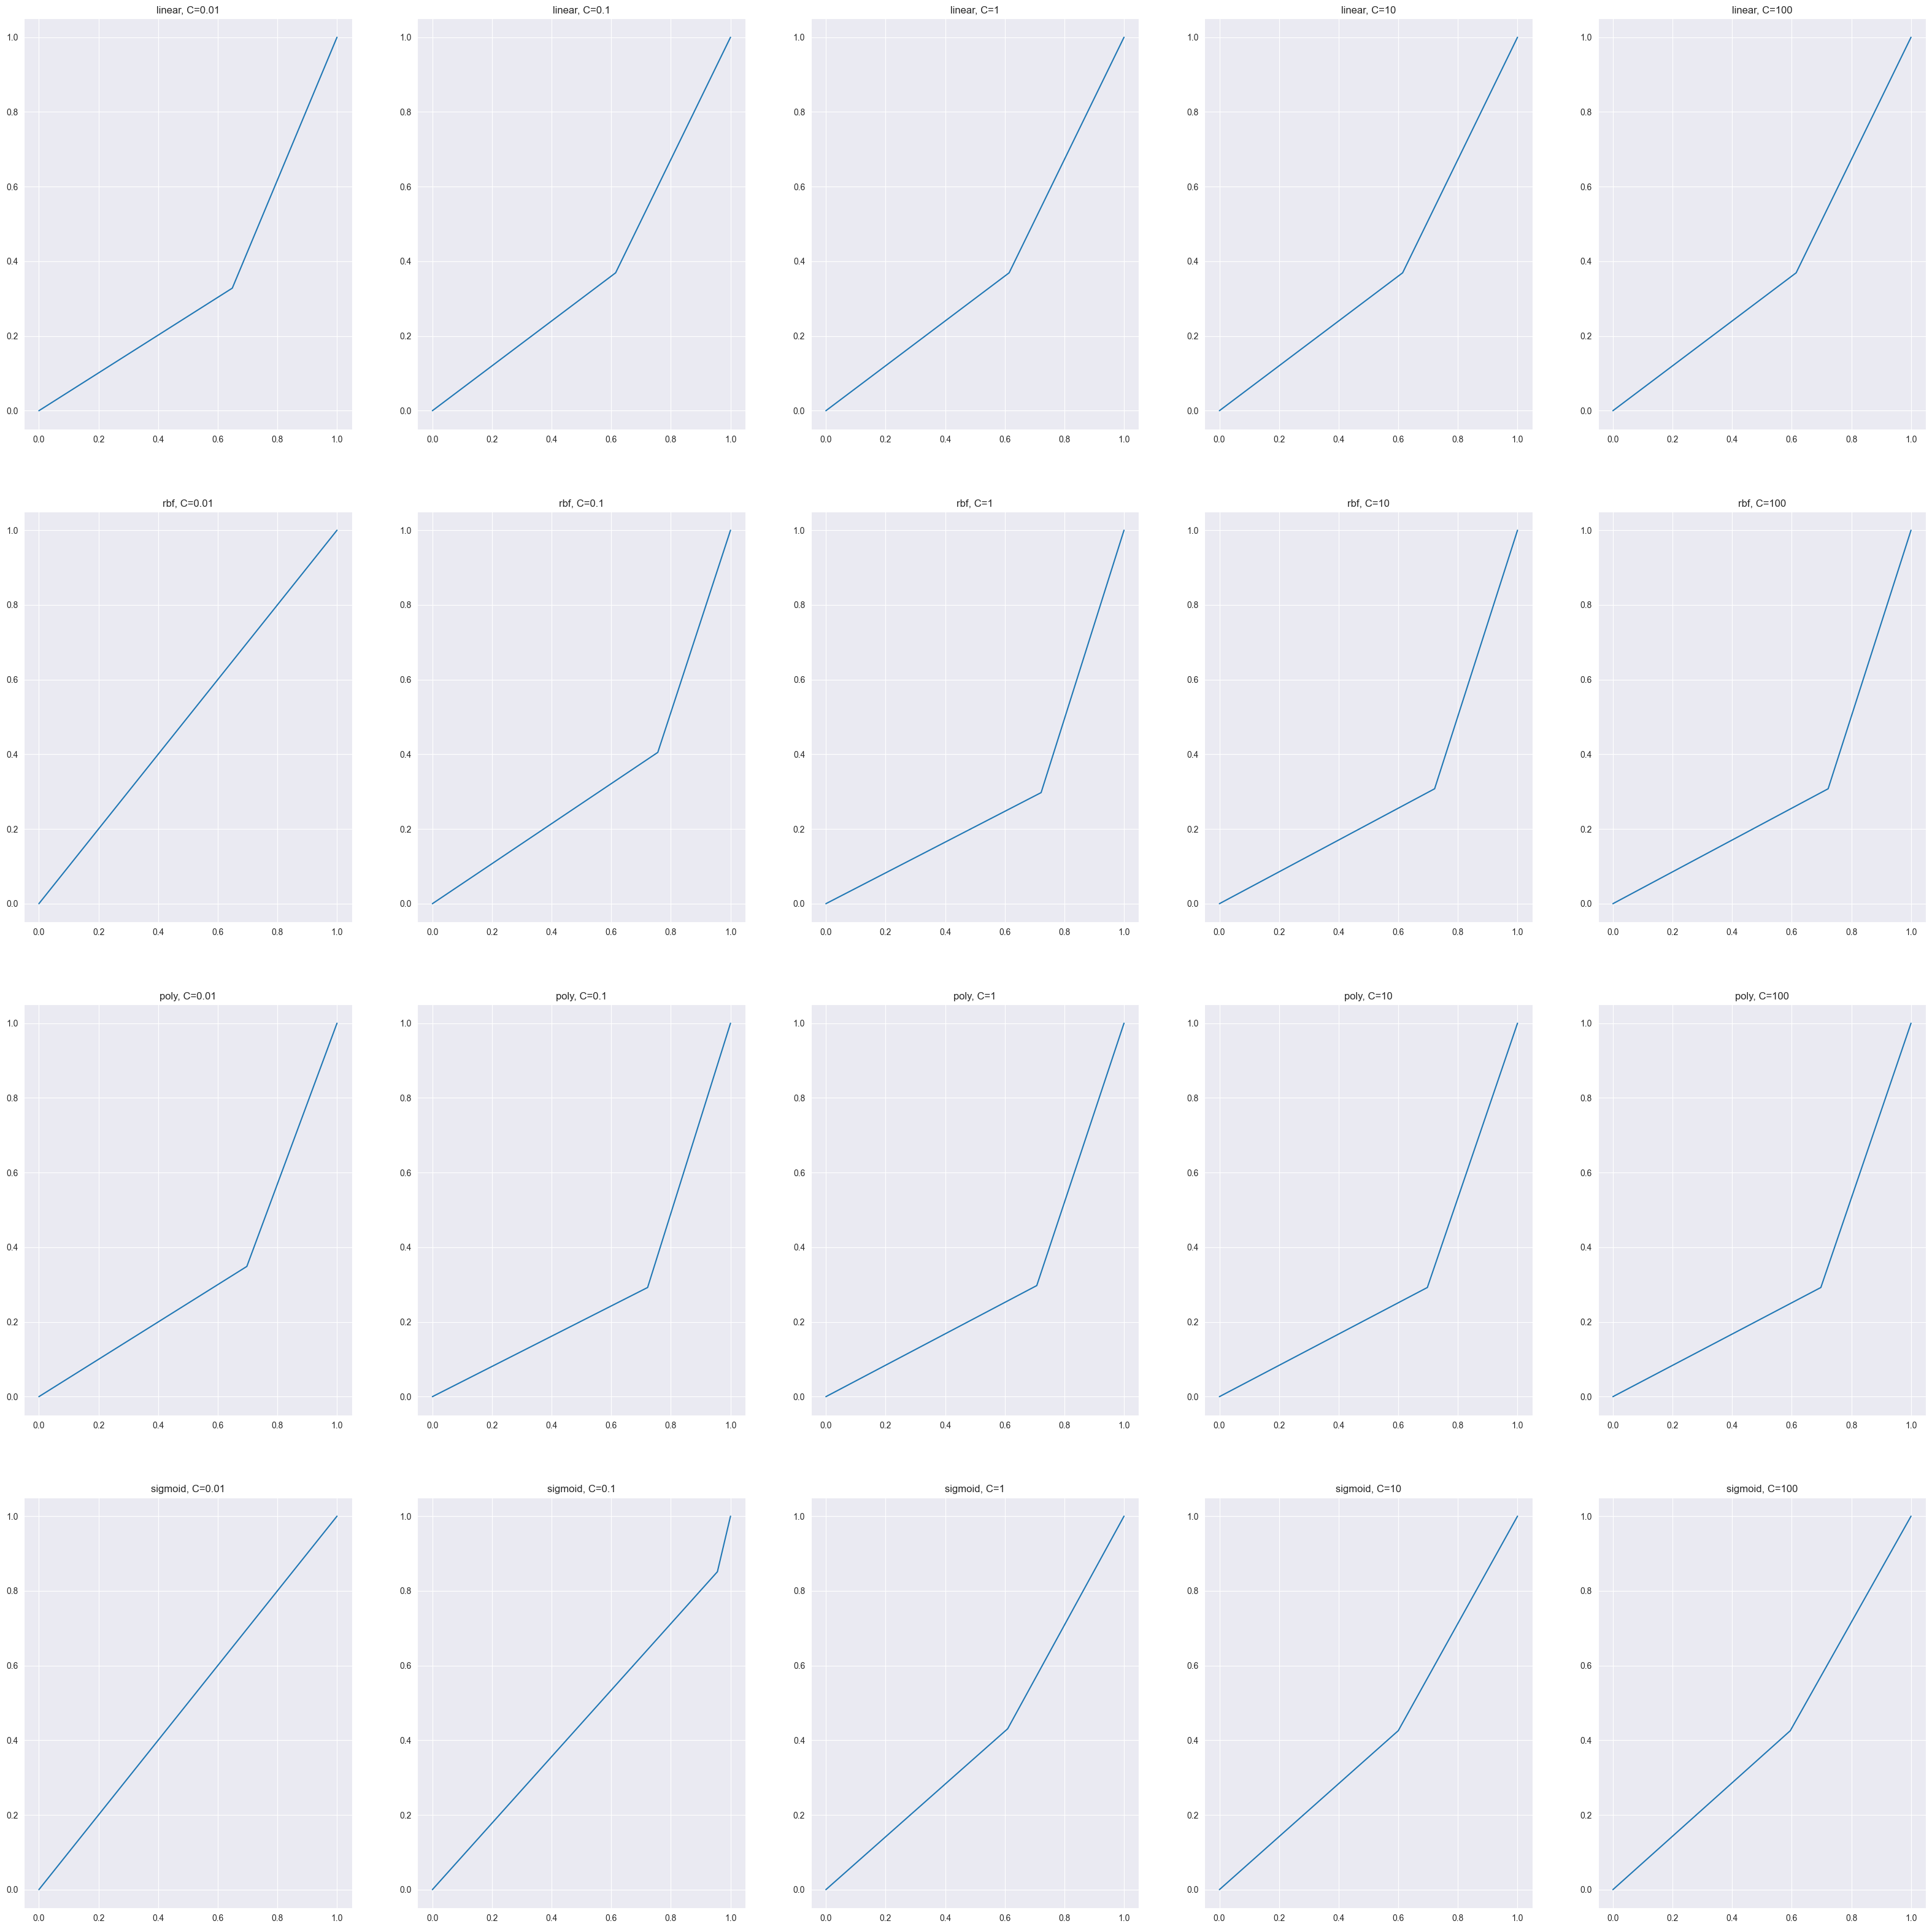

In [27]:
#show the ROC curve of each model in the row of kernel, in the column of C
f,axs=plt.subplots(4,5,figsize=(40,40))
axs[0,0].plot(sl001['fpr'],sl001['tpr'])
axs[0,0].set_title('linear, C=0.01')
axs[0,1].plot(sl01['fpr'],sl01['tpr'])
axs[0,1].set_title('linear, C=0.1')
axs[0,2].plot(sl1['fpr'],sl1['tpr'])
axs[0,2].set_title('linear, C=1')
axs[0,3].plot(sl10['fpr'],sl10['tpr'])
axs[0,3].set_title('linear, C=10')
axs[0,4].plot(sl100['fpr'],sl100['tpr'])
axs[0,4].set_title('linear, C=100')
axs[1,0].plot(sr001['fpr'],sr001['tpr'])
axs[1,0].set_title('rbf, C=0.01')
axs[1,1].plot(sr01['fpr'],sr01['tpr'])
axs[1,1].set_title('rbf, C=0.1')
axs[1,2].plot(sr1['fpr'],sr1['tpr'])
axs[1,2].set_title('rbf, C=1')
axs[1,3].plot(sr10['fpr'],sr10['tpr'])
axs[1,3].set_title('rbf, C=10')
axs[1,4].plot(sr100['fpr'],sr100['tpr'])
axs[1,4].set_title('rbf, C=100')
axs[2,0].plot(sp001['fpr'],sp001['tpr'])
axs[2,0].set_title('poly, C=0.01')
axs[2,1].plot(sp01['fpr'],sp01['tpr'])
axs[2,1].set_title('poly, C=0.1')
axs[2,2].plot(sp1['fpr'],sp1['tpr'])
axs[2,2].set_title('poly, C=1')
axs[2,3].plot(sp10['fpr'],sp10['tpr'])
axs[2,3].set_title('poly, C=10')
axs[2,4].plot(sp100['fpr'],sp100['tpr'])
axs[2,4].set_title('poly, C=100')
axs[3,0].plot(ss001['fpr'],ss001['tpr'])
axs[3,0].set_title('sigmoid, C=0.01')
axs[3,1].plot(ss01['fpr'],ss01['tpr'])
axs[3,1].set_title('sigmoid, C=0.1')
axs[3,2].plot(ss1['fpr'],ss1['tpr'])
axs[3,2].set_title('sigmoid, C=1')
axs[3,3].plot(ss10['fpr'],ss10['tpr'])
axs[3,3].set_title('sigmoid, C=10')
axs[3,4].plot(ss100['fpr'],ss100['tpr'])
axs[3,4].set_title('sigmoid, C=100')

Text(0.5, 1.0, 'sigmoid, f1')

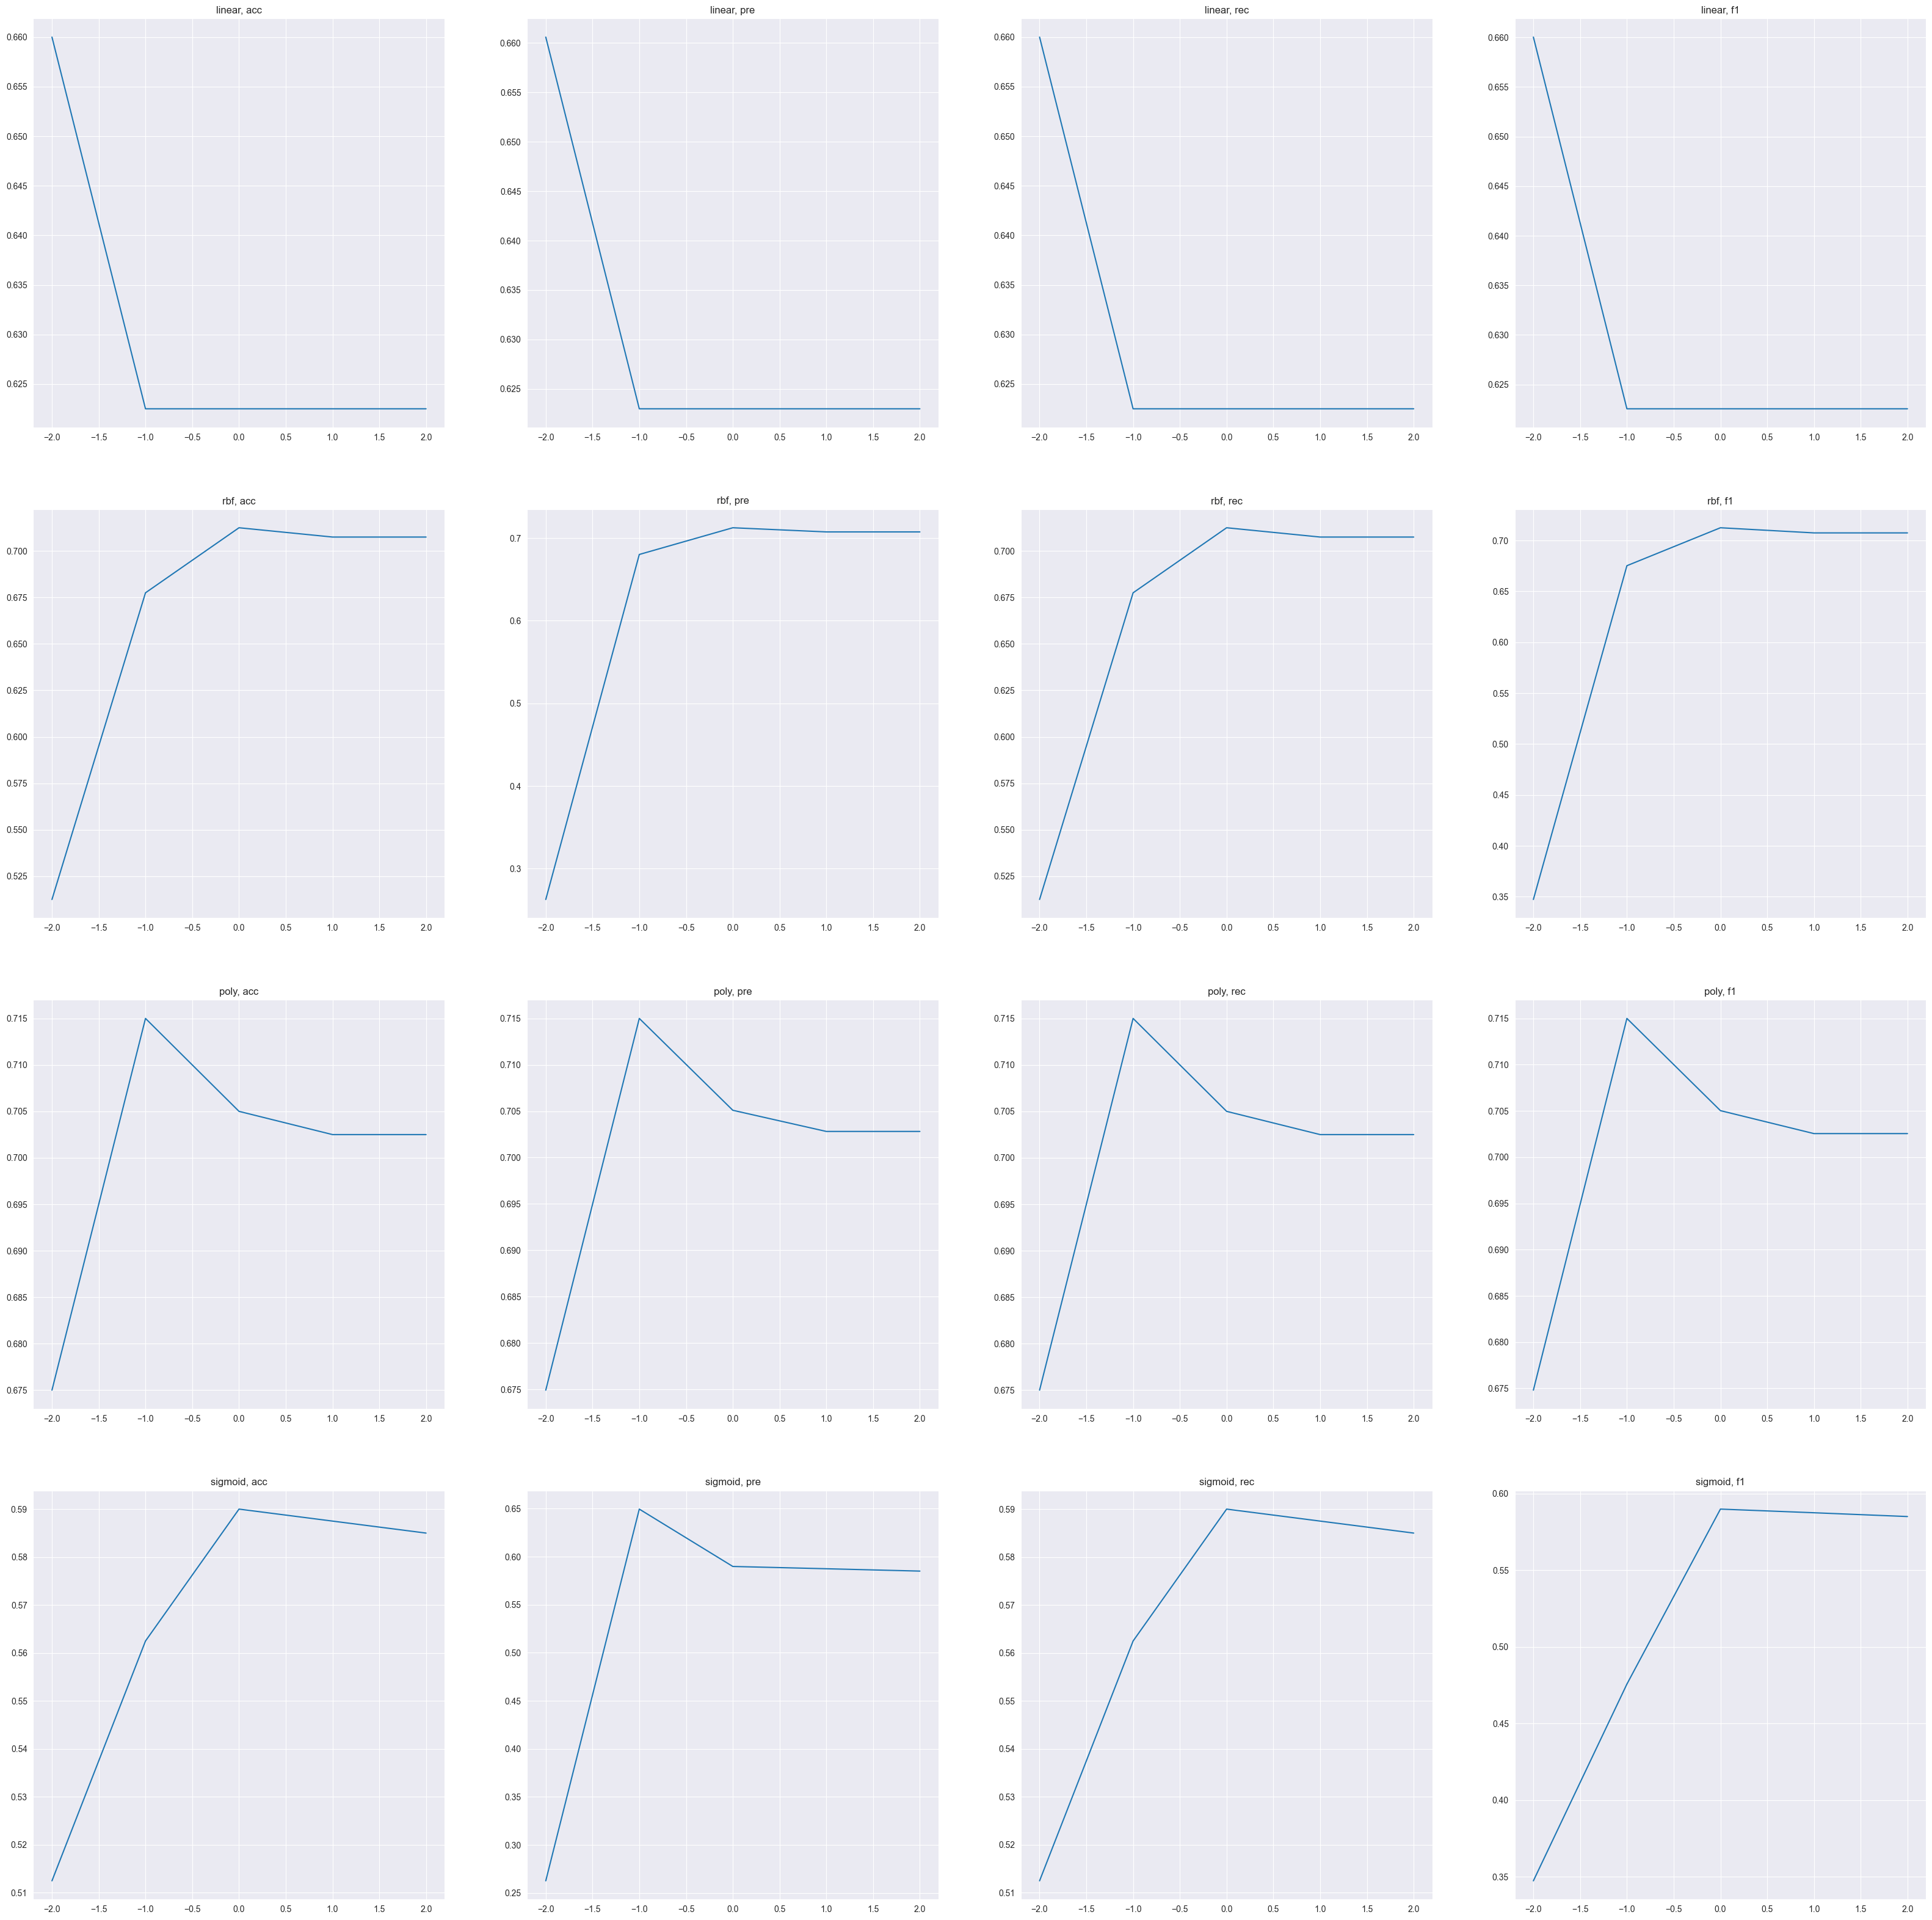

In [31]:
#plot the different metrics of each model in different kernel through different C in line chart
f,axs=plt.subplots(4,4,figsize=(40,40))
#acc,pre,rec,f1* linear,rbf,poly,sigmoid
axs[0,0].plot([-2,-1,0,1,2],[sl001['acc'],sl01['acc'],sl1['acc'],sl10['acc'],sl100['acc']])
axs[0,0].set_title('linear, acc')
axs[0,1].plot([-2,-1,0,1,2],[sl001['prec'],sl01['prec'],sl1['prec'],sl10['prec'],sl100['prec']])
axs[0,1].set_title('linear, pre')
axs[0,2].plot([-2,-1,0,1,2],[sl001['rec'],sl01['rec'],sl1['rec'],sl10['rec'],sl100['rec']])
axs[0,2].set_title('linear, rec')
axs[0,3].plot([-2,-1,0,1,2],[sl001['f1'],sl01['f1'],sl1['f1'],sl10['f1'],sl100['f1']])
axs[0,3].set_title('linear, f1')
axs[1,0].plot([-2,-1,0,1,2],[sr001['acc'],sr01['acc'],sr1['acc'],sr10['acc'],sr100['acc']])
axs[1,0].set_title('rbf, acc')
axs[1,1].plot([-2,-1,0,1,2],[sr001['prec'],sr01['prec'],sr1['prec'],sr10['prec'],sr100['prec']])
axs[1,1].set_title('rbf, pre')
axs[1,2].plot([-2,-1,0,1,2],[sr001['rec'],sr01['rec'],sr1['rec'],sr10['rec'],sr100['rec']])
axs[1,2].set_title('rbf, rec')
axs[1,3].plot([-2,-1,0,1,2],[sr001['f1'],sr01['f1'],sr1['f1'],sr10['f1'],sr100['f1']])
axs[1,3].set_title('rbf, f1')
axs[2,0].plot([-2,-1,0,1,2],[sp001['acc'],sp01['acc'],sp1['acc'],sp10['acc'],sp100['acc']])
axs[2,0].set_title('poly, acc')
axs[2,1].plot([-2,-1,0,1,2],[sp001['prec'],sp01['prec'],sp1['prec'],sp10['prec'],sp100['prec']])
axs[2,1].set_title('poly, pre')
axs[2,2].plot([-2,-1,0,1,2],[sp001['rec'],sp01['rec'],sp1['rec'],sp10['rec'],sp100['rec']])
axs[2,2].set_title('poly, rec')
axs[2,3].plot([-2,-1,0,1,2],[sp001['f1'],sp01['f1'],sp1['f1'],sp10['f1'],sp100['f1']])
axs[2,3].set_title('poly, f1')
axs[3,0].plot([-2,-1,0,1,2],[ss001['acc'],ss01['acc'],ss1['acc'],ss10['acc'],ss100['acc']])
axs[3,0].set_title('sigmoid, acc')
axs[3,1].plot([-2,-1,0,1,2],[ss001['prec'],ss01['prec'],ss1['prec'],ss10['prec'],ss100['prec']])
axs[3,1].set_title('sigmoid, pre')
axs[3,2].plot([-2,-1,0,1,2],[ss001['rec'],ss01['rec'],ss1['rec'],ss10['rec'],ss100['rec']])
axs[3,2].set_title('sigmoid, rec')
axs[3,3].plot([-2,-1,0,1,2],[ss001['f1'],ss01['f1'],ss1['f1'],ss10['f1'],ss100['f1']])
axs[3,3].set_title('sigmoid, f1')




The best model is rbf,c=1 and poly,c=0.1.